 # Olympics Project

[Data in Kaggle](https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results?select=athlete_events.csv)

### Import the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Read the data

In [2]:
df = pd.read_csv('/content/athlete_events.csv')

### Don't forget to drop duplicates first

In [3]:
df.info()

df.drop_duplicates(inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 269731 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----

### Find the missing data in each column

In [4]:
display(df.isna().sum())

,0
ID,0
Name,0
Sex,0
Age,9315
Height,58814
Weight,61527
Team,0
NOC,0
Games,0
Year,0


### Number of males and females

In [5]:
df['Sex'].value_counts()

,count
Sex,
M,195353
F,74378


### How many cities do we have and what are they ?

In [ ]:
df['City'].value_counts()

display(df['City'].value_counts().count())
display(df['City'].unique())


42

array(['Barcelona', 'London', 'Antwerpen', 'Paris', 'Calgary',
       'Albertville', 'Lillehammer', 'Los Angeles', 'Salt Lake City',
       'Helsinki', 'Lake Placid', 'Sydney', 'Atlanta', 'Stockholm',
       'Sochi', 'Nagano', 'Torino', 'Beijing', 'Rio de Janeiro', 'Athina',
       'Squaw Valley', 'Innsbruck', 'Sarajevo', 'Mexico City', 'Munich',
       'Seoul', 'Berlin', 'Oslo', "Cortina d'Ampezzo", 'Melbourne',
       'Roma', 'Amsterdam', 'Montreal', 'Moskva', 'Tokyo', 'Vancouver',
       'Grenoble', 'Sapporo', 'Chamonix', 'St. Louis', 'Sankt Moritz',
       'Garmisch-Partenkirchen'], dtype=object)

### Find the number of athlete for each year

In [ ]:
df.groupby('Year')['ID'].nunique()


,ID
Year,
1896,176
1900,1224
1904,650
1906,841
1908,2024
1912,2409
1920,2676
1924,3565
1928,3703


### Which athlete participated the most? (his/her name and ID)

In [ ]:
display(df.groupby(['Name', 'ID'])['Year'].count().sort_values(ascending=False).max())

display(df.groupby(['Name', 'ID'])['Year'].count().sort_values(ascending=False).head())

display(df.groupby(['Name', 'ID'])['Year'].count().sort_values(ascending=False).head(1))


39

,,Year
Name,ID,
Heikki Ilmari Savolainen,106296,39
"Joseph ""Josy"" Stoffel",115354,38
Ioannis Theofilakis,119591,36
Takashi Ono,89187,32
Andreas Wecker,129196,32


,,Year
Name,ID,
Heikki Ilmari Savolainen,106296,39


### Find the number of each medal for each year.
##### The output should look like this
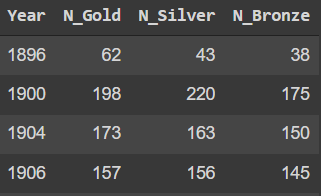

Medal,Bronze,Gold,Silver
Year,,,
1896,38,62,43
1900,175,198,220
1904,150,173,163
1906,145,157,156


Medal,N_Gold,N_Silver,N_Bronze
Year,,,
1896,62,43,38
1900,198,220,175
1904,173,163,150
1906,157,156,145


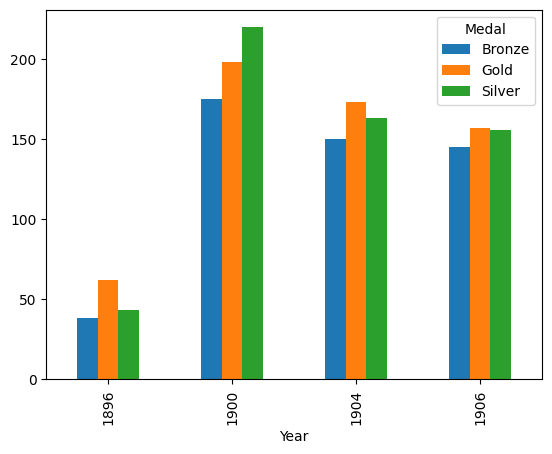

In [ ]:
medal_counts = df.groupby(['Year', 'Medal'])['ID'].count().unstack().head(4)

display(medal_counts)

medal_counts.plot(kind='bar')

medal_counts = medal_counts.rename(columns={'Gold':'N_Gold', 'Silver':'N_Silver', 'Bronze':'N_Bronze'})

medal_counts = medal_counts[['N_Gold', 'N_Silver', 'N_Bronze']]

display(medal_counts)

### Provide all your answers with plots

### Find the number of winners with the gold medal in each city?

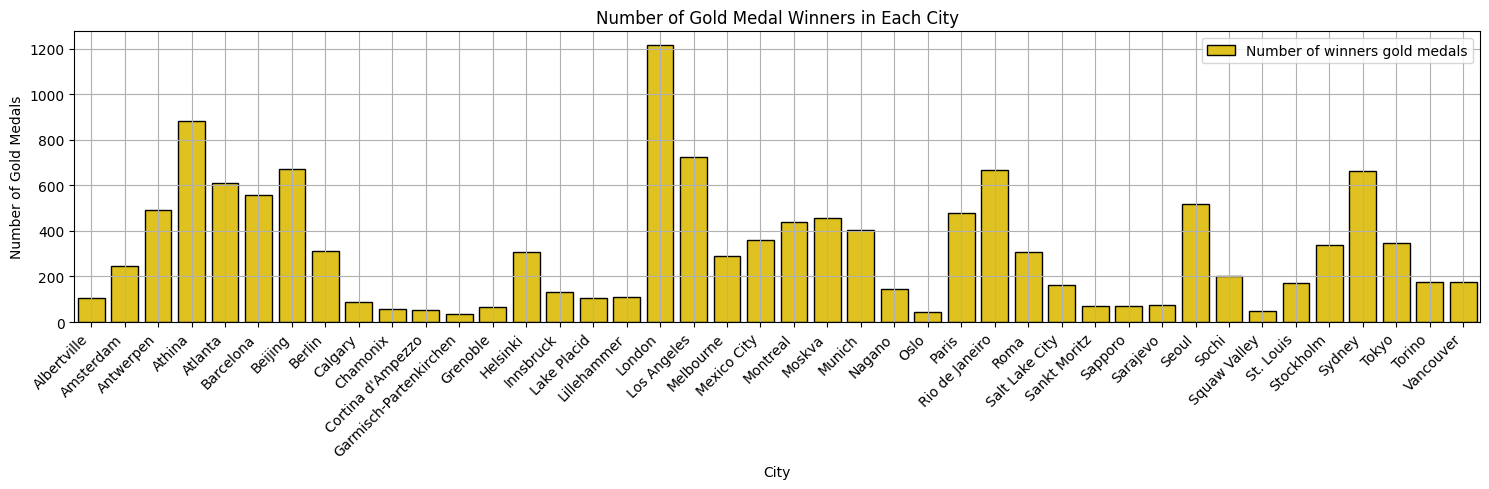

In [ ]:
gold_medals = df[df['Medal'] == 'Gold']

gold_medals_by_city = gold_medals.groupby('City').size().reset_index(name='Gold Medals')

plt.figure(figsize=(15, 5))

sns.barplot(x = gold_medals_by_city['City'], y = gold_medals_by_city['Gold Medals'], color='gold', label = 'Number of winners gold medals', edgecolor = 'black')

plt.xlabel('City')

plt.ylabel('Number of Gold Medals')

plt.title('Number of Gold Medal Winners in Each City')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()

plt.grid(True)

plt.legend()

plt.show()

### Find the total missing data for each year?

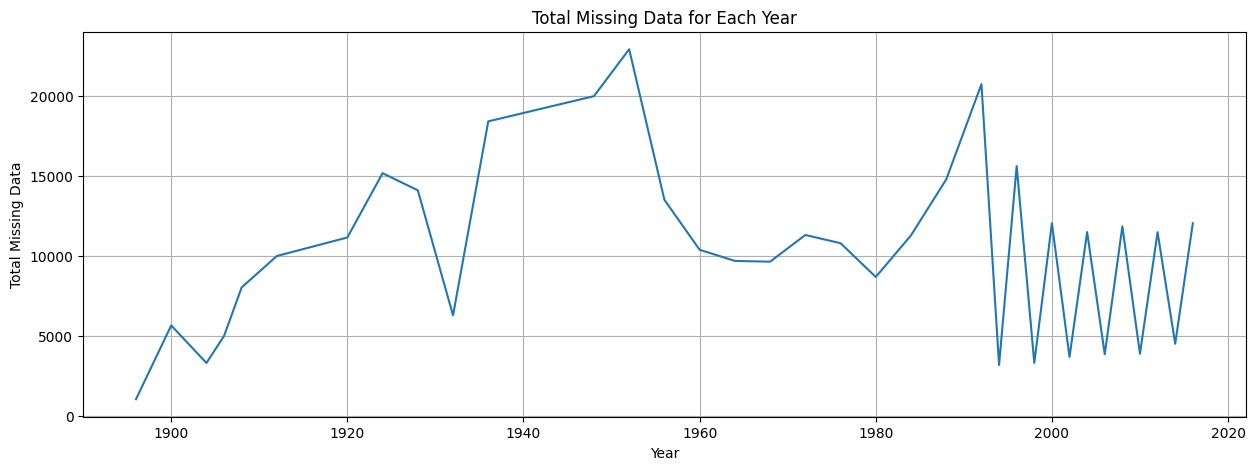

In [12]:
# prompt: in plot.
# Find the total missing data for each year?

import matplotlib.pyplot as plt
missing_data_by_year = df.groupby('Year').apply(lambda x: x.isna().sum().sum()).reset_index(name='Total Missing Data')

plt.figure(figsize=(15, 5))
sns.lineplot(x='Year', y='Total Missing Data', data=missing_data_by_year)
plt.xlabel('Year')
plt.ylabel('Total Missing Data')
plt.title('Total Missing Data for Each Year')
plt.grid(True)
plt.show()



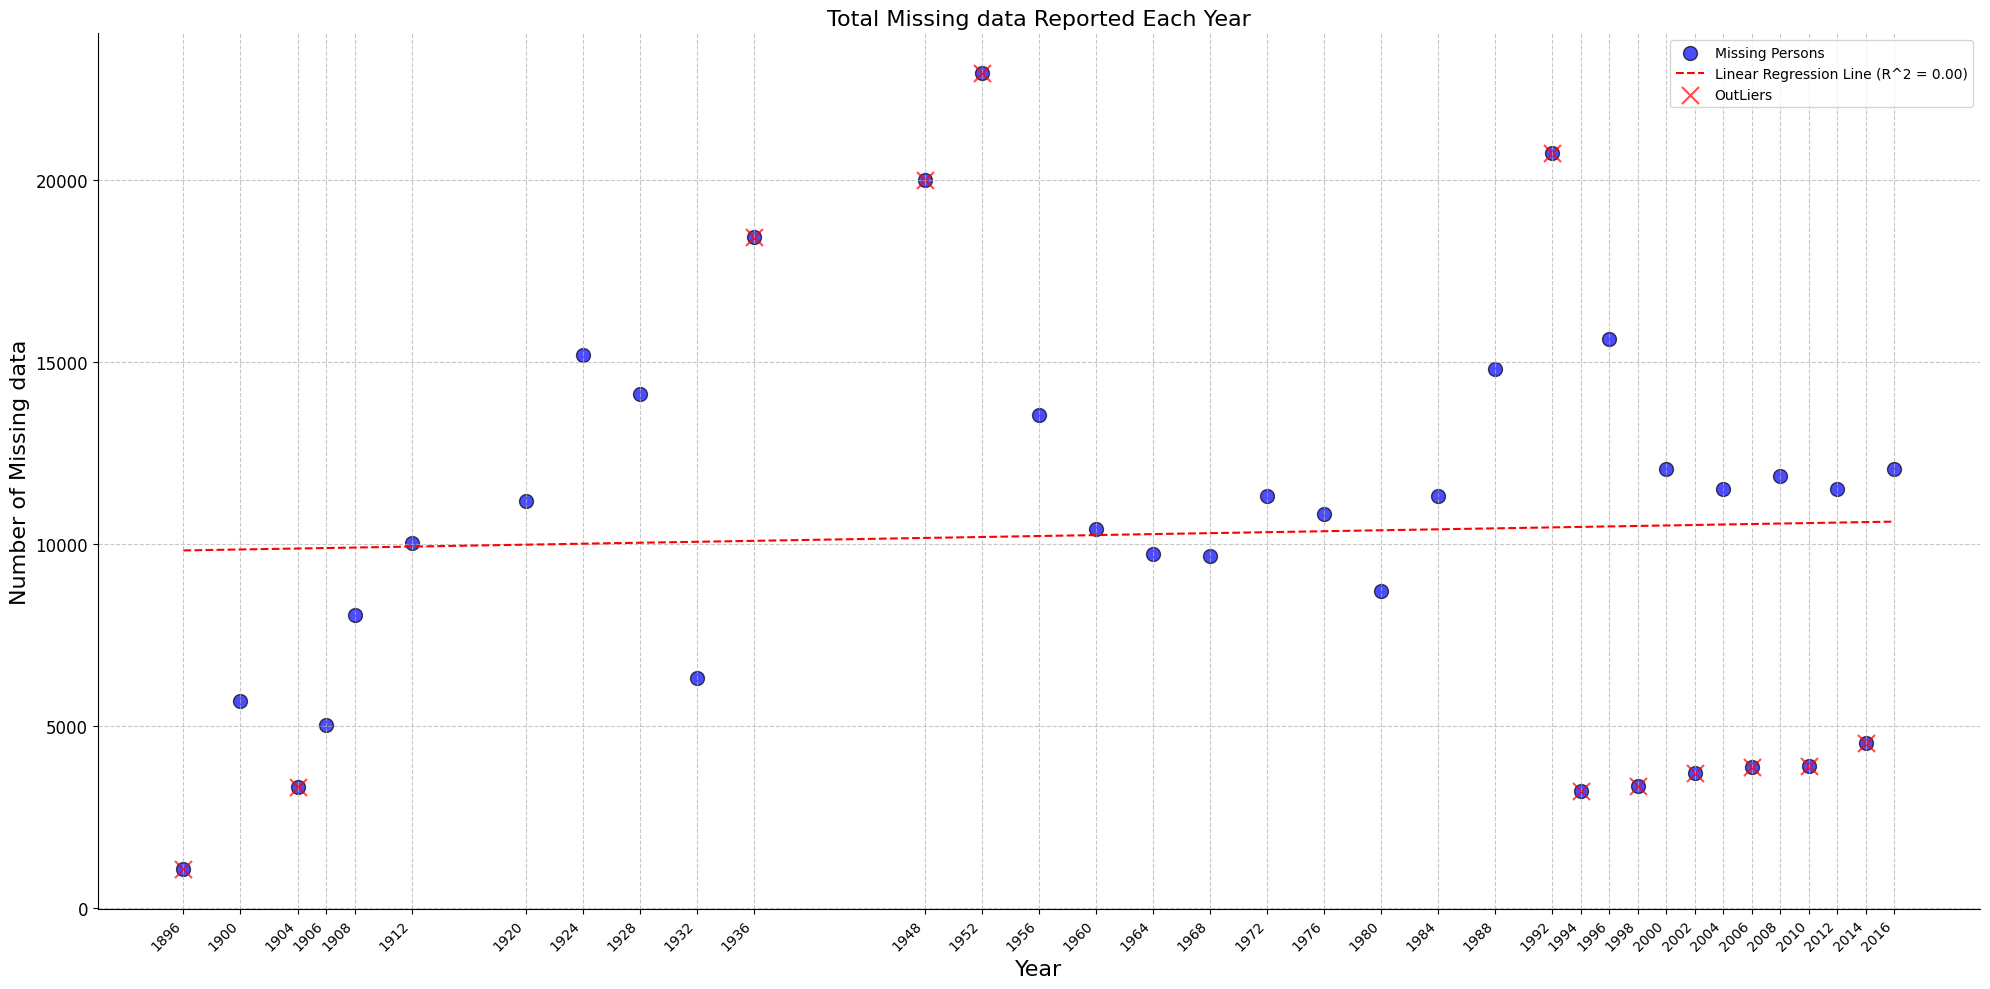

In [16]:
from scipy.stats import linregress

missing_data_by_year = df.groupby('Year').apply(lambda x: x.isna().sum().sum()).reset_index(name='Total Missing Data')

slope, intercept, r_value, p_value, std_err = linregress(missing_data_by_year['Year'], missing_data_by_year['Total Missing Data'])

line = slope * missing_data_by_year['Year'] + intercept


plt.figure(figsize=(20, 10))


plt.scatter(missing_data_by_year['Year'], missing_data_by_year['Total Missing Data'], label='Missing Persons', color='blue', s=100, alpha=0.7, edgecolor='black')

plt.plot(missing_data_by_year['Year'], line, color = 'r', linestyle = '--', label = f'Linear Regression Line (R^2 = {r_value**2:.2f})')

residuals = missing_data_by_year['Total Missing Data'] - line

outliers = missing_data_by_year[abs(residuals) > residuals.std()]

plt.scatter(outliers['Year'], outliers['Total Missing Data'], marker = 'x',color='red', s=150, alpha=0.7, label ='OutLiers')

plt.xticks(rotation=30, ha='right')

plt.title('Total Missing data Reported Each Year', fontsize = 16)

plt.xlabel('Year', fontsize = 16)

plt.ylabel('Number of Missing data', fontsize = 16)

plt.grid(True, linestyle='--', alpha=0.7)

sns.despine()


plt.xticks(missing_data_by_year['Year'],  rotation=45, ha='right')

plt.yticks(fontsize = 12)

plt.legend()

plt.tight_layout()

plt.show()

In [13]:
df['Year'].isnull().sum()

0

In [ ]:
missing_data_by_year = df.groupby('Year').apply(lambda x: x.isna().sum().sum()).reset_index(name='Missing_Persons')

display(missing_data_by_year)


,Year,Missing_Persons
0,1896,1065
1,1900,5676
2,1904,3331
3,1906,5022
4,1908,8057
5,1912,10018
6,1920,11175
7,1924,15194
8,1928,14124
9,1932,6308


### Dont use for loops, and provide all your answers with plots.

### Has the number of athletes changed over time for Summer and Winter?

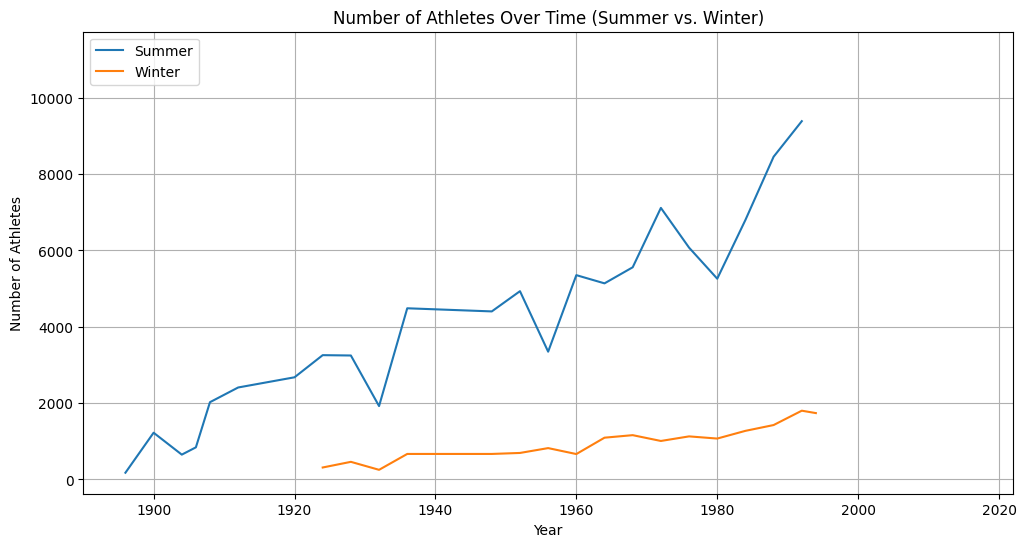

In [ ]:
athlete_counts_by_season = df.groupby(['Year', 'Season'])['ID'].nunique().unstack()

plt.figure(figsize=(12, 6))

plt.plot(athlete_counts_by_season.index, athlete_counts_by_season['Summer'], label='Summer')

plt.plot(athlete_counts_by_season.index, athlete_counts_by_season['Winter'], label='Winter')

plt.xlabel('Year')

plt.ylabel('Number of Athletes')

plt.title('Number of Athletes Over Time (Summer vs. Winter)')

plt.legend()

plt.grid(True)

plt.show()

In [ ]:
count_seasons = df.groupby(['Year', 'Season'])['ID'].nunique().unstack()

display(count_seasons)

correlation_summer = count_seasons['Summer'].corr(count_seasons['Summer'].index.to_series())

correlation_winter = count_seasons['Winter'].corr(count_seasons['Winter'].index.to_series())

print(f"Correlation between Year and Number of Summer Athletes: {correlation_summer}")

print(f"Correlation between Year and Number of Winter Athletes: {correlation_winter}")


Season,Summer,Winter
Year,,
1896,176.0,NaN
1900,1224.0,NaN
1904,650.0,NaN
1906,841.0,NaN
1908,2024.0,NaN
1912,2409.0,NaN
1920,2676.0,NaN
1924,3256.0,313.0
1928,3247.0,461.0


Correlation between Year and Number of Summer Athletes: 0.9616571194922444
Correlation between Year and Number of Winter Athletes: 0.9427900398056768
